In [6]:
pip install trimesh vedo numpy matplotlib pillow imageio

Note: you may need to restart the kernel to use updated packages.


In [7]:
path = "models/bunny.obj" 

In [8]:
import trimesh

def load_mesh(path: str) -> trimesh.Trimesh:
    obj = trimesh.load(path)

    if isinstance(obj, trimesh.Scene):
        geoms = list(obj.geometry.values())
        if not geoms:
            raise ValueError("El archivo no contiene geometrías.")
        mesh = trimesh.util.concatenate(geoms)
    elif isinstance(obj, trimesh.Trimesh):
        mesh = obj
    else:
        raise TypeError(f"Tipo devuelto por trimesh.load no soportado: {type(obj)}")

    return mesh

mesh = load_mesh(path)
mesh

<trimesh.Trimesh(vertices.shape=(34834, 3), faces.shape=(69451, 3))>

In [9]:
n_vertices = len(mesh.vertices)
n_faces    = len(mesh.faces)
n_edges    = len(mesh.edges_unique)

print("=== INFO DEL MODELO ===")
print("Vértices:", n_vertices)
print("Aristas :", n_edges)
print("Caras   :", n_faces)

=== INFO DEL MODELO ===
Vértices: 34834
Aristas : 104288
Caras   : 69451


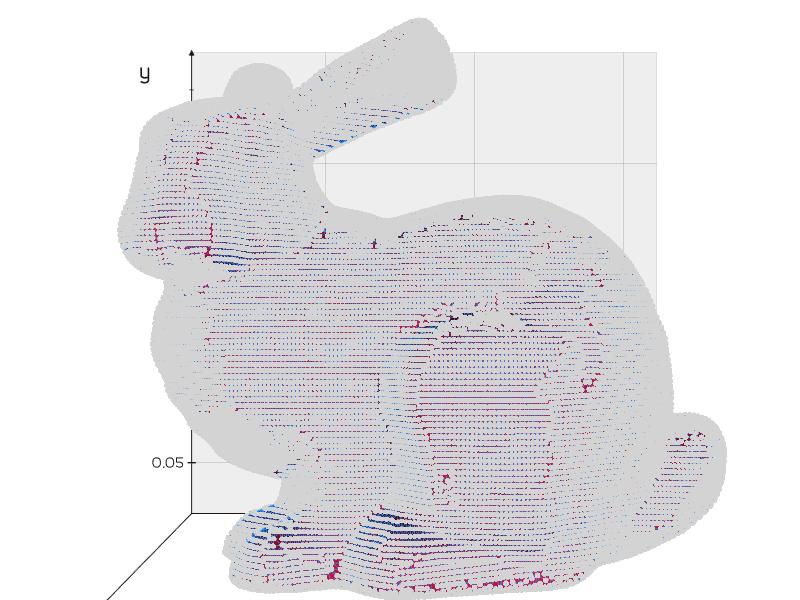

In [14]:
import numpy as np
from vedo import Mesh as VedoMesh, Points, Lines, show

V = mesh.vertices          # (N, 3)
F = mesh.faces             # (M, 3)
E = mesh.edges_unique      # (K, 2) 

# Caras
m_faces = VedoMesh([V, F]).c("crimson").alpha(1.0)

# Aristas (wireframe)
segments = V[E]            # (K, 2, 3) -> pares de puntos 3D
m_edges = Lines(segments).c("dodgerblue").lw(1)

# Vertices (puntos)
m_verts = Points(V).c("lightgray").ps(6)          # o .point_size(6)

show(m_faces, m_edges, m_verts, axes=1)


In [15]:
from vedo import Plotter, Video

outfile = "bunny_spin.gif"   # también puede ser .mp4

plt = Plotter(offscreen=True, axes=0)
plt.show(m_faces, m_edges, m_verts, resetcam=True)

video = Video(outfile, fps=24)

for _ in range(120):          # 120 frames
    plt.camera.Azimuth(3)     # rota alrededor
    plt.render()
    video.add_frame()

video.close()
plt.close()

print("Exportado:", outfile)


📽  Video file bunny_spin.gif is open... ... saved as bunny_spin.gif
Exportado: bunny_spin.gif
